# Exploratory Data Analysis (EDA) on FAANG Stocks

In this notebook, we analyze historical stock data for FAANG companies (AAPL, AMZN, GOOGL, META, NFLX).
We focus on understanding price trends, volatility, returns, and technical indicators.

## Import Libraries

In [1]:
import os

import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
from ipywidgets import interact
from sqlalchemy import create_engine

# Set plot style
sns.set_theme(style="whitegrid")

## Database Setup and Connection

In [2]:
# Load environment variables
load_dotenv()

DB_HOST = os.getenv('DB_HOST')
DB_USER = os.getenv('DB_USER')
DB_PASSWORD = os.getenv('DB_PASSWORD')
DB_NAME = os.getenv('DB_NAME')

# Create SQLAlchemy engine
engine = create_engine(f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}/{DB_NAME}")

# Load feature_stock_data table
query = "SELECT * FROM feature_stock_data"
df = pd.read_sql(query, engine)

# Show first few rows
df.head()

,id,ticker,date,open_price,high_price,low_price,close_price,adj_close,volume,created_at,daily_return,ma_20,ma_50,volatility_20,rsi_14
0,1,AAPL,2019-01-02,36.9445,37.8890,36.7870,37.6672,None,148158800,2025-05-04 21:20:27,NaN,37.6672,37.6672,NaN,NaN
1,2,AAPL,2019-01-03,34.3422,34.7572,33.8699,33.9153,None,365248800,2025-05-04 21:20:27,-0.099607,35.7912,35.7912,2.65299,0.0000
2,3,AAPL,2019-01-04,34.4734,35.4322,34.2993,35.3631,None,234428400,2025-05-04 21:20:27,0.042689,35.6485,35.6485,1.89217,27.8439
3,4,AAPL,2019-01-07,35.4680,35.4990,34.8002,35.2844,None,219111200,2025-05-04 21:20:27,-0.002225,35.5575,35.5575,1.55564,27.4288
4,5,AAPL,2019-01-08,35.6732,36.2122,35.4251,35.9570,None,164101200,2025-05-04 21:20:27,0.019062,35.6374,35.6374,1.35902,35.6310


## Data Overview

In [3]:
# Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7965 entries, 0 to 7964
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             7965 non-null   int64         
 1   ticker         7965 non-null   object        
 2   date           7965 non-null   object        
 3   open_price     7965 non-null   float64       
 4   high_price     7965 non-null   float64       
 5   low_price      7965 non-null   float64       
 6   close_price    7965 non-null   float64       
 7   adj_close      0 non-null      object        
 8   volume         7965 non-null   int64         
 9   created_at     7965 non-null   datetime64[ns]
 10  daily_return   7960 non-null   float64       
 11  ma_20          7965 non-null   float64       
 12  ma_50          7965 non-null   float64       
 13  volatility_20  7960 non-null   float64       
 14  rsi_14         7960 non-null   float64       
dtypes: datetime64[ns](1),

In [4]:
# Summary Statistics
df.describe()

,id,open_price,high_price,low_price,close_price,volume,created_at,daily_return,ma_20,ma_50,volatility_20,rsi_14
count,7965.00000,7965.000000,7965.000000,7965.000000,7965.000000,7.965000e+03,7965,7960.000000,7965.000000,7965.000000,7960.000000,7960.000000
mean,3983.00000,232.710129,235.855823,229.634931,232.833701,4.440847e+07,2025-05-04 21:20:27.000000256,0.001120,230.985446,228.296868,8.531361,54.340311
min,1.00000,34.342200,34.757200,33.869900,33.915300,1.144000e+06,2025-05-04 21:20:27,-0.351166,35.557500,35.557500,0.469581,0.000000
25%,1992.00000,120.123000,121.678000,118.514000,120.265000,1.455830e+07,2025-05-04 21:20:27,-0.010104,119.013000,118.270000,3.181880,41.989600
50%,3983.00000,169.650000,171.809000,168.027000,170.015000,3.118180e+07,2025-05-04 21:20:27,0.001139,168.941000,168.736000,5.539935,55.188650
75%,5974.00000,298.752000,303.669000,294.750000,298.742000,6.168210e+07,2025-05-04 21:20:27,0.012678,299.706000,295.435000,10.320475,67.042950
max,7965.00000,1136.660000,1159.440000,1133.320000,1156.490000,4.265100e+08,2025-05-04 21:20:27,0.232825,1008.530000,971.932000,99.666200,100.000000
std,2299.44178,176.330357,178.840637,173.836952,176.424869,4.306676e+07,NaN,0.023490,173.618380,170.090621,9.151685,16.839472


In [5]:
# Number of Records per Ticker
df['ticker'].value_counts()

ticker
AAPL     1593
AMZN     1593
GOOGL    1593
META     1593
NFLX     1593
Name: count, dtype: int64

## Data Visualization

In [6]:
# Filter AAPL data
ticker = 'AAPL'
df_ticker = df[df['ticker'] == ticker]

### Close Price and Moving Averages

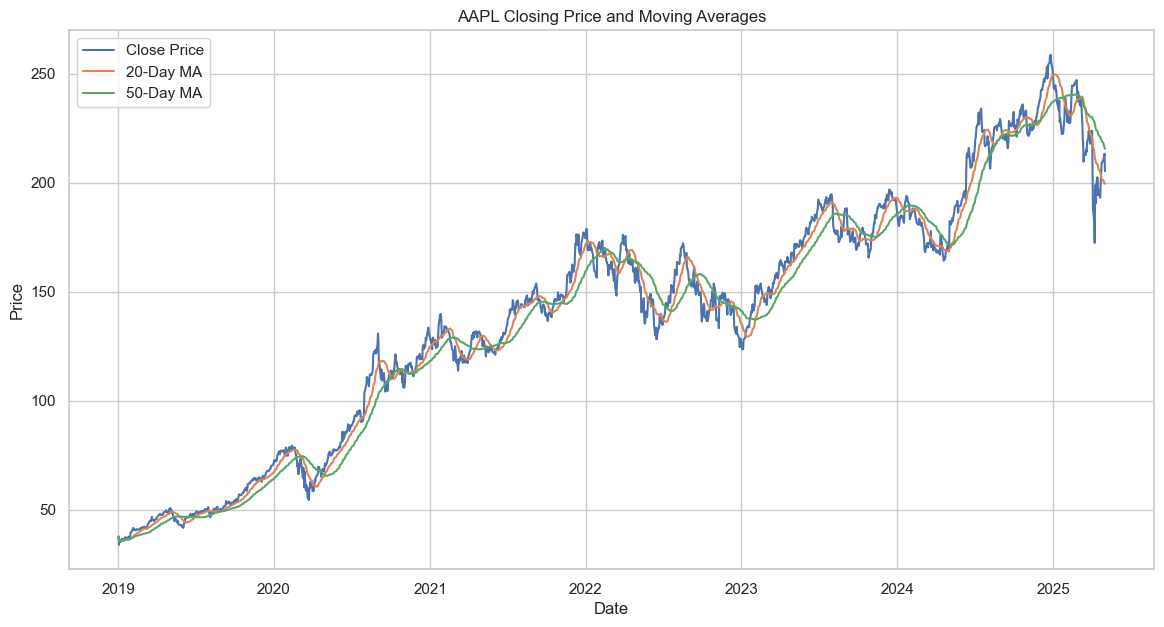

In [7]:
plt.figure(figsize=(14, 7))
plt.plot(df_ticker['date'], df_ticker['close_price'], label='Close Price')
plt.plot(df_ticker['date'], df_ticker['ma_20'], label='20-Day MA')
plt.plot(df_ticker['date'], df_ticker['ma_50'], label='50-Day MA')
plt.title(f"{ticker} Closing Price and Moving Averages")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Daily Return Distribution

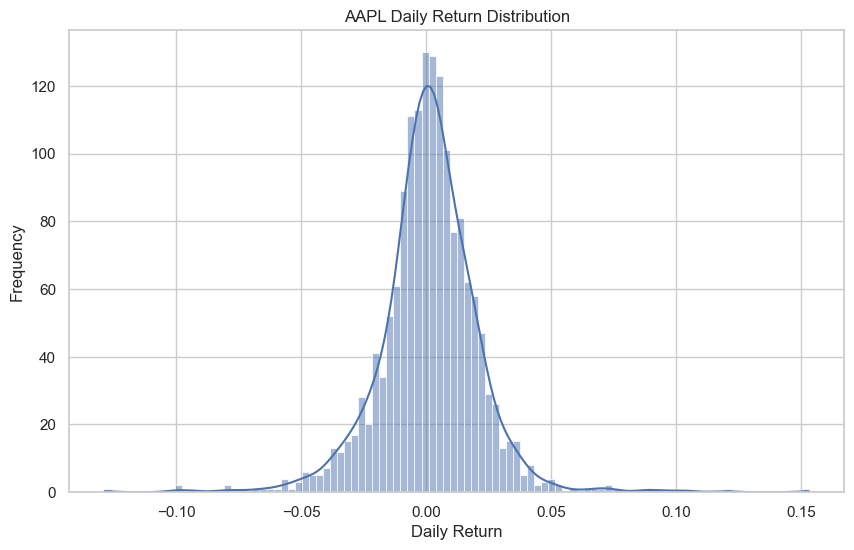

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df_ticker['daily_return'].dropna(), bins=100, kde=True)
plt.title(f"{ticker} Daily Return Distribution")
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

### Interactive Ticker Selection

In [9]:
# Available tickers
available_tickers = df['ticker'].unique().tolist()


# Define a function to plot
def plot_ticker(ticker):
    df_ticker = df[df['ticker'] == ticker]

    fig, axes = plt.subplots(2, 1, figsize=(14, 12))

    # Price & Moving Averages
    axes[0].plot(df_ticker['date'], df_ticker['close_price'], label='Close Price')
    axes[0].plot(df_ticker['date'], df_ticker['ma_20'], label='20-Day MA')
    axes[0].plot(df_ticker['date'], df_ticker['ma_50'], label='50-Day MA')
    axes[0].set_title(f"{ticker} Closing Price and Moving Averages")
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Price')
    axes[0].legend()

    # Daily Return Distribution
    sns.histplot(df_ticker['daily_return'].dropna(), bins=100, kde=True, ax=axes[1])
    axes[1].set_title(f"{ticker} Daily Return Distribution")
    axes[1].set_xlabel('Daily Return')
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [10]:
# Create a dropdown
interact(plot_ticker, ticker=widgets.Dropdown(options=available_tickers, description='Ticker:'));


interactive(children=(Dropdown(description='Ticker:', options=('AAPL', 'AMZN', 'GOOGL', 'META', 'NFLX'), value…

### Golden Cross and Death Cross Detection

In [11]:
def plot_crossover(ticker):
    df_ticker = df[df['ticker'] == ticker].copy()

    # Identify crossover points
    df_ticker['ma_20_above_50'] = df_ticker['ma_20'] > df_ticker['ma_50']
    crossovers = df_ticker['ma_20_above_50'].ne(df_ticker['ma_20_above_50'].shift())

    # Plotting
    plt.figure(figsize=(14, 7))
    plt.plot(df_ticker['date'], df_ticker['close_price'], label='Close Price', color='black')
    plt.plot(df_ticker['date'], df_ticker['ma_20'], label='20-Day MA', color='blue')
    plt.plot(df_ticker['date'], df_ticker['ma_50'], label='50-Day MA', color='orange')

    # Scatter crossover points
    plt.scatter(df_ticker.loc[crossovers, 'date'], df_ticker.loc[crossovers, 'close_price'],
                color='red', label='Crossover', s=50)

    plt.title(f"{ticker} Golden/Death Cross Points")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

In [12]:
interact(plot_crossover, ticker=widgets.Dropdown(options=available_tickers, description='Ticker:'));

interactive(children=(Dropdown(description='Ticker:', options=('AAPL', 'AMZN', 'GOOGL', 'META', 'NFLX'), value…

### COVID-19 Crash Focus

In [13]:
def plot_covid_crash(ticker):
    df_ticker = df[df['ticker'] == ticker].copy()

    # Make sure 'date' is Timestamp type
    if not pd.api.types.is_datetime64_any_dtype(df_ticker['date']):
        df_ticker['date'] = pd.to_datetime(df_ticker['date'])

    covid_start = pd.Timestamp('2020-02-01')
    covid_end = pd.Timestamp('2020-04-30')

    # Now safe to compare
    df_covid = df_ticker[(df_ticker['date'] >= covid_start) & (df_ticker['date'] <= covid_end)]

    if df_covid.empty:
        print(f"No COVID period data available for {ticker}.")
        return

    plt.figure(figsize=(14, 7))
    plt.plot(df_covid['date'], df_covid['close_price'], label='Close Price', color='purple')
    plt.axvspan(covid_start, covid_end, color='red', alpha=0.2)

    crash_min_idx = df_covid['close_price'].idxmin()
    crash_min_date = df_covid.loc[crash_min_idx, 'date']
    crash_min_price = df_covid.loc[crash_min_idx, 'close_price']

    plt.annotate(
        'Market Crash',
        xy=(crash_min_date, crash_min_price),
        xytext=(crash_min_date, crash_min_price * 1.2),
        arrowprops=dict(facecolor='black', arrowstyle='->')
    )

    plt.title(f"{ticker} Stock Price during COVID-19 Crash (Feb-Apr 2020)")
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

In [14]:
interact(plot_covid_crash, ticker=widgets.Dropdown(options=available_tickers, description='Ticker:'));

interactive(children=(Dropdown(description='Ticker:', options=('AAPL', 'AMZN', 'GOOGL', 'META', 'NFLX'), value…

### Volatility Comparison Across FAANG Stocks

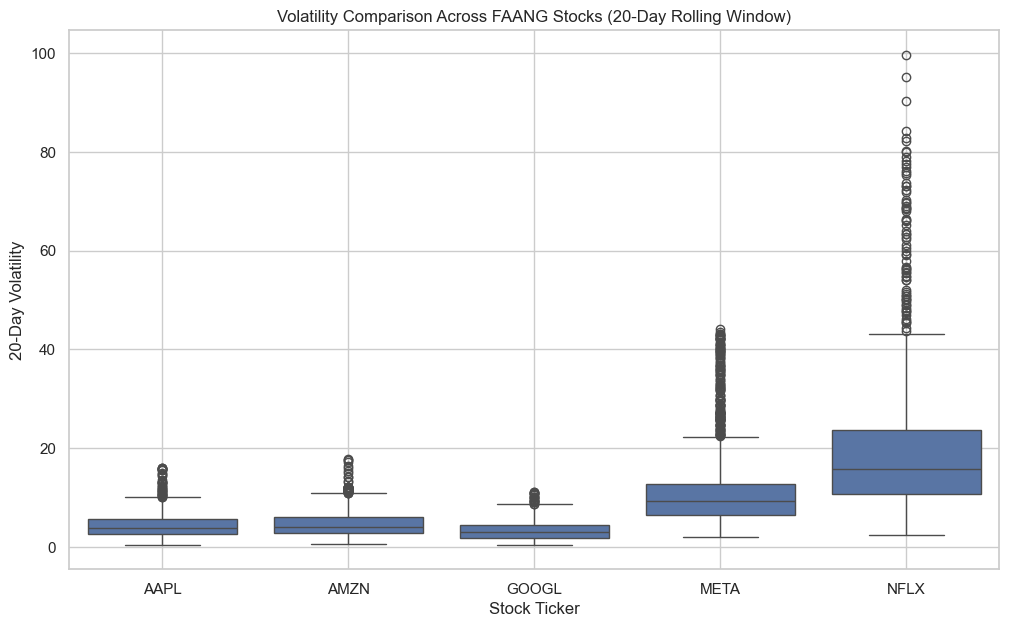

In [15]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='ticker', y='volatility_20', data=df)
plt.title('Volatility Comparison Across FAANG Stocks (20-Day Rolling Window)')
plt.xlabel('Stock Ticker')
plt.ylabel('20-Day Volatility')
plt.grid(True)
plt.show()

#### Observations:

- Stocks with higher median volatility have wider and taller boxes.
- If a stock shows more outliers, it indicates periods of extreme volatility.
- Among FAANG stocks, we can visually compare which stock was more stable vs volatile.

### Final Observations:

- FAANG stocks showed varying volatility during the COVID-19 crash.
- Netflix (NFLX) and Amazon (AMZN) displayed higher relative volatility post-crash.
- Feature engineering like moving averages, volatility, and RSI enriched the analysis.
- This prepared dataset can now be cleanly used for machine learning model building.

---